## Import Packages

In [1]:
import pyspark

In [2]:
from pyspark.sql import SparkSession

In [3]:
from pyspark.sql.functions import col

In [4]:
from pyspark.sql.functions import desc

In [5]:
from pyspark.sql.functions import asc

In [6]:
import findspark

In [7]:
findspark.init()

In [8]:
spark = SparkSession.builder.appName('4x400mRelay').getOrCreate()

## Import Data 

In [9]:
OutdoorMens4x400m = spark.read.format('csv').option('inferSchema','true').option('header','true').option('path','OutdoorMens4x400m.csv').load()

In [10]:
OutdoorWomens4x400m = spark.read.format('csv').option('inferSchema','true').option('header','true').option('path','OutdoorWomens4x400m.csv').load()

In [11]:
IndoorMens4x400m = spark.read.format('csv').option('inferSchema','true').option('header','true').option('path','MenIndoor4x400m.csv').load()

In [12]:
IndoorWomens4x400m = spark.read.format('csv').option('inferSchema','true').option('header','true').option('path','WomensIndoor4x400m.csv').load()

In [13]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

## Create View

In [14]:
IndoorMens4x400m.createOrReplaceTempView("IndoorMens4x400m")

In [15]:
IndoorWomens4x400m.createOrReplaceTempView("IndoorWomens4x400m")

In [16]:
OutdoorMens4x400m.createOrReplaceTempView("OutdoorMens4x400m")

In [17]:
OutdoorWomens4x400m.createOrReplaceTempView("OutdoorWomens4x400m")

## Basic Selection 

In [18]:
resultone = spark.sql("SELECT * FROM IndoorMens4x400m")
resultone.show()

+--------------------+--------------------+
|               Names|               Times|
+--------------------+--------------------+
|(1) Southern Cali...|          3:00.77📺 |
|        (2) Arkansas|3:01.09 AA = Perf...|
|       (3) Texas A&M|            3:01.39 |
|         (4) Florida|            3:01.43 |
|         (5) Houston|3:01.51 bb = Perf...|
|     — TEXAS A&M {2}|3:01.56 bb = Perf...|
|         (6) Alabama|            3:01.78 |
|      — ARKANSAS {2}|            3:02.09 |
|       — FLORIDA {2}|            3:02.09 |
|       — FLORIDA {3}|            3:02.18 |
|       — FLORIDA {4}|3:02.23 bb = Perf...|
|     — TEXAS A&M {3}|3:02.35 bb = Perf...|
|            (7) Iowa|            3:02.40 |
|     — TEXAS A&M {4}|3:02.52 bb = Perf...|
|         (8) Georgia|            3:02.59 |
|       — FLORIDA {5}|            3:02.61 |
|       — FLORIDA {6}|            3:02.65 |
|        (9) Oklahoma|            3:02.72 |
|     — TEXAS A&M {5}|            3:02.77 |
|     — TEXAS A&M {6}|           

In [19]:
resulttwo = spark.sql("SELECT * FROM IndoorWomens4x400m")
resulttwo.show()

+--------------------+--------------------+
|               Names|               Times|
+--------------------+--------------------+
|        (1) Arkansas|            3:21.75 |
|      — ARKANSAS {2}|            3:24.09 |
|       (2) Texas A&M|            3:25.43 |
|           (3) Texas|            3:25.67 |
|        (4) Kentucky|            3:25.89 |
|     — TEXAS A&M {2}|          3:26.27📺 |
|      — ARKANSAS {3}|            3:26.40 |
|     — TEXAS A&M {3}|            3:26.68 |
|         — TEXAS {2}|            3:26.73 |
|     — TEXAS A&M {4}|            3:26.99 |
|(5) Southern Cali...|            3:27.03 |
|          (6) Oregon|            3:27.07 |
|      — ARKANSAS {4}|            3:27.23 |
|      — KENTUCKY {2}|            3:27.27 |
|        — OREGON {2}|3:27.40 AA = Perf...|
|         — TEXAS {3}|3:27.42 AA = Perf...|
|— SOUTHERN CALIFO...|            3:27.45 |
|— SOUTHERN CALIFO...|3:27.56 bb = Perf...|
|      — ARKANSAS {5}|            3:27.57 |
|         (7) Florida|           

In [20]:
resultthree = spark.sql("SELECT * FROM OutdoorMens4x400m")
resultthree.show()

+--------------------+-------+
|             Schools|  Times|
+--------------------+-------+
|         (1) Florida|2:57.74|
|       — FLORIDA {2}|2:57.76|
|   (2) Arizona State|2:57.78|
|         (3) Alabama|2:58.01|
|       — FLORIDA {3}|2:58.53|
|       — FLORIDA {4}|2:58.62|
|         (4) Georgia|2:58.82|
|       — FLORIDA {5}|2:58.88|
|(5) Southern Cali...|2:59.00|
|       (6) Texas A&M|2:59.05|
| — ARIZONA STATE {2}|2:59.14|
|       — ALABAMA {2}|2:59.15|
|(7) North Carolin...|2:59.21|
|       — ALABAMA {3}|2:59.24|
|            (8) UCLA|2:59.25|
|       — FLORIDA {6}|2:59.44|
|          — UCLA {2}|2:59.51|
|             (9) LSU|2:59.59|
|       — FLORIDA {7}|2:59.60|
|     — TEXAS A&M {2}|2:59.60|
+--------------------+-------+
only showing top 20 rows



In [21]:
resultFour = spark.sql("SELECT * FROM OutdoorWomens4x400m")
resultFour.show()

+--------------------+-------+
|             Schools|  Times|
+--------------------+-------+
|        (1) Kentucky|3:21.93|
|       (2) Texas A&M|3:22.01|
|     — TEXAS A&M {2}|3:22.34|
|      — KENTUCKY {2}|3:22.55|
|        (3) Arkansas|3:22.55|
|           (4) Texas|3:22.94|
|          (5) Oregon|3:23.13|
|         — TEXAS {2}|3:23.27|
|     — TEXAS A&M {3}|3:23.30|
|         — TEXAS {3}|3:23.35|
|(6) Southern Cali...|3:23.35|
|      — ARKANSAS {2}|3:23.69|
|         — TEXAS {4}|3:23.75|
|      — ARKANSAS {3}|3:24.05|
|         — TEXAS {5}|3:24.21|
|      — ARKANSAS {4}|3:24.45|
|— SOUTHERN CALIFO...|3:24.54|
|        — OREGON {2}|3:24.54|
|     — TEXAS A&M {4}|3:24.55|
|             (7) LSU|3:24.59|
+--------------------+-------+
only showing top 20 rows



## Query One - Times for Women 4x400m

In [22]:
QueryOneA = spark.sql("SELECT Times, COUNT(*) as count FROM IndoorWomens4x400m GROUP BY Times ORDER BY count DESC")
QueryOneA.show()

+--------------------+-----+
|               Times|count|
+--------------------+-----+
|            3:32.34 |    3|
|            3:31.78 |    2|
|            3:32.46 |    2|
|3:32.56 OTOT = Pe...|    2|
|            3:31.54 |    2|
|3:32.54 OTOT = Pe...|    2|
|            3:29.36 |    2|
|            3:30.79 |    2|
|            3:31.76 |    2|
|            3:30.08 |    2|
|            3:32.56 |    2|
|            3:28.62 |    2|
|3:29.86 OTOT = Pe...|    2|
|            3:28.82 |    2|
|            3:32.19 |    2|
|            3:30.80 |    2|
|3:29.42 OTOT = Pe...|    2|
|            3:31.89 |    2|
|3:31.17 bb = Perf...|    2|
|3:30.85 bb = Perf...|    2|
+--------------------+-----+
only showing top 20 rows



In [23]:
QueryOneB = spark.sql("SELECT Times, COUNT(*) as count FROM OutdoorWomens4x400m GROUP BY Times ORDER BY count DESC")
QueryOneB.show()

+-------+-----+
|  Times|count|
+-------+-----+
|3:26.73|    4|
|3:28.08|    3|
|3:28.10|    3|
|3:28.27|    3|
|3:28.42|    3|
|3:28.78|    3|
|3:29.01|    3|
|3:28.65|    3|
|3:28.43|    3|
|3:28.85|    3|
|3:28.84|    3|
|3:27.88|    3|
|3:29.03|    3|
|3:28.93|    3|
|3:28.89|    3|
|3:29.19|    3|
|3:29.20|    2|
|3:27.47|    2|
|3:26.90|    2|
|3:28.90|    2|
+-------+-----+
only showing top 20 rows



## Query Two - Times for Mens 4x400m

In [25]:
QueryTwoA = spark.sql("SELECT Names, COUNT(*) as count FROM IndoorMens4x400m GROUP BY Names ORDER BY count DESC")
QueryTwoA.show()

+--------------------+-----+
|               Names|count|
+--------------------+-----+
|              BAYLOR|    6|
|             FLORIDA|    5|
|                 LSU|    3|
|           TEXAS A&M|    3|
|                 SMU|    2|
|               TEXAS|    2|
|       ARIZONA STATE|    2|
|                IOWA|    2|
|            KENTUCKY|    2|
|             ALABAMA|    2|
|            ARKANSAS|    2|
|           — LSU {3}|    1|
|          — LSU {10}|    1|
|     — TEXAS A&M {6}|    1|
|— SOUTHERN CALIFO...|    1|
|          OHIO STATE|    1|
|      (16) Tennessee|    1|
|      (21) Minnesota|    1|
|           — LSU {9}|    1|
|       — ALABAMA {4}|    1|
+--------------------+-----+
only showing top 20 rows



In [27]:
QueryTwoB = spark.sql("SELECT Schools, COUNT(*) as count FROM OutdoorMens4x400m GROUP BY Schools ORDER BY count DESC")
QueryTwoB.show()

+--------------------+-----+
|             Schools|count|
+--------------------+-----+
|  (13) Florida State|    1|
|           — LSU {3}|    1|
|(5) Southern Cali...|    1|
|     — TEXAS A&M {6}|    1|
|— SOUTHERN CALIFO...|    1|
|       — ALABAMA {4}|    1|
|    — OHIO STATE {2}|    1|
|           — LSU {7}|    1|
|           (16) Iowa|    1|
|     — TEXAS A&M {8}|    1|
|           — LSU {5}|    1|
|     — TEXAS A&M {4}|    1|
|        — BAYLOR {4}|    1|
|       — FLORIDA {5}|    1|
|       — BAYLOR {11}|    1|
|     — TEXAS A&M {5}|    1|
|     — TEXAS A&M {3}|    1|
|     (23) Iowa State|    1|
|    — TEXAS A&M {24}|    1|
|       — ALABAMA {5}|    1|
+--------------------+-----+
only showing top 20 rows



## Query Three - Schools for Women 4x400m

In [29]:
QueryThreeA = spark.sql("SELECT Names, COUNT(*) as count FROM IndoorWomens4x400m GROUP BY Names ORDER BY count DESC")
QueryThreeA.show()

+--------------------+-----+
|               Names|count|
+--------------------+-----+
|                 LSU|    5|
| SOUTHERN CALIFORNIA|    5|
|             FLORIDA|    4|
|                UCLA|    3|
|              PURDUE|    3|
|            ARKANSAS|    3|
|          OHIO STATE|    2|
|            KENTUCKY|    2|
|      SOUTH CAROLINA|    2|
|           — LSU {3}|    1|
|          — LSU {10}|    1|
|     — ARKANSAS {26}|    1|
|(5) Southern Cali...|    1|
|— SOUTHERN CALIFO...|    1|
|     — TEXAS A&M {6}|    1|
|        — TEXAS {25}|    1|
|— SOUTHERN CALIFO...|    1|
|        — TEXAS {11}|    1|
|    — TEXAS A&M {28}|    1|
|     — KENTUCKY {19}|    1|
+--------------------+-----+
only showing top 20 rows



In [31]:
QueryThreeB = spark.sql("SELECT Schools, COUNT(*) as count FROM OutdoorWomens4x400m GROUP BY Schools ORDER BY count DESC")
QueryThreeB.show()

+--------------------+-----+
|             Schools|count|
+--------------------+-----+
|           — LSU {3}|    1|
|          — LSU {10}|    1|
|— SOUTHERN CALIFO...|    1|
|    — TEXAS A&M {32}|    1|
|     — TEXAS A&M {6}|    1|
|        — TEXAS {25}|    1|
|— SOUTHERN CALIFO...|    1|
|        — TEXAS {11}|    1|
|    — TEXAS A&M {28}|    1|
|  — MIAMI (FLA.) {5}|    1|
|     — ARKANSAS {23}|    1|
|        — OREGON {7}|    1|
|        — TEXAS {26}|    1|
|           (4) Texas|    1|
|        — TEXAS {10}|    1|
|           — LSU {9}|    1|
|    — OHIO STATE {2}|    1|
|       — ALABAMA {4}|    1|
|           — LSU {7}|    1|
|      — ARKANSAS {8}|    1|
+--------------------+-----+
only showing top 20 rows



## Query Four - Schools for Mens 4x400m

In [32]:
QueryFourA = spark.sql("SELECT Schools, COUNT(*) as count FROM OutdoorMens4x400m GROUP BY Schools ORDER BY count DESC")
QueryFourA.show()

+--------------------+-----+
|             Schools|count|
+--------------------+-----+
|  (13) Florida State|    1|
|           — LSU {3}|    1|
|(5) Southern Cali...|    1|
|     — TEXAS A&M {6}|    1|
|— SOUTHERN CALIFO...|    1|
|       — ALABAMA {4}|    1|
|    — OHIO STATE {2}|    1|
|           — LSU {7}|    1|
|           (16) Iowa|    1|
|     — TEXAS A&M {8}|    1|
|           — LSU {5}|    1|
|     — TEXAS A&M {4}|    1|
|        — BAYLOR {4}|    1|
|       — FLORIDA {5}|    1|
|       — BAYLOR {11}|    1|
|     — TEXAS A&M {5}|    1|
|     — TEXAS A&M {3}|    1|
|     (23) Iowa State|    1|
|    — TEXAS A&M {24}|    1|
|       — ALABAMA {5}|    1|
+--------------------+-----+
only showing top 20 rows



In [34]:
QueryFourB = spark.sql("SELECT Names, COUNT(*) as count FROM IndoorMens4x400m GROUP BY Names ORDER BY count DESC")
QueryFourB.show()

+--------------------+-----+
|               Names|count|
+--------------------+-----+
|              BAYLOR|    6|
|             FLORIDA|    5|
|                 LSU|    3|
|           TEXAS A&M|    3|
|                 SMU|    2|
|               TEXAS|    2|
|       ARIZONA STATE|    2|
|                IOWA|    2|
|            KENTUCKY|    2|
|             ALABAMA|    2|
|            ARKANSAS|    2|
|           — LSU {3}|    1|
|          — LSU {10}|    1|
|     — TEXAS A&M {6}|    1|
|— SOUTHERN CALIFO...|    1|
|          OHIO STATE|    1|
|      (16) Tennessee|    1|
|      (21) Minnesota|    1|
|           — LSU {9}|    1|
|       — ALABAMA {4}|    1|
+--------------------+-----+
only showing top 20 rows



## Query Five - Percentage of Times for Womens 4x400m

In [35]:
QueryFiveA = spark.sql("SELECT Times, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM OutdoorWomens4x400m)) * 100 as percentage FROM OutdoorWomens4x400m GROUP BY Times")
QueryFiveA.show()

+-------+-----+-------------------+
|  Times|count|         percentage|
+-------+-----+-------------------+
|3:27.04|    1|0.35335689045936397|
|3:28.10|    3| 1.0600706713780919|
|3:25.89|    1|0.35335689045936397|
|3:28.45|    1|0.35335689045936397|
|3:28.46|    1|0.35335689045936397|
|3:25.16|    1|0.35335689045936397|
|3:27.87|    1|0.35335689045936397|
|3:28.40|    1|0.35335689045936397|
|3:28.64|    1|0.35335689045936397|
|3:29.22|    1|0.35335689045936397|
|3:28.48|    1|0.35335689045936397|
|3:25.48|    1|0.35335689045936397|
|3:27.53|    2| 0.7067137809187279|
|3:28.31|    1|0.35335689045936397|
|3:29.00|    1|0.35335689045936397|
|3:27.43|    1|0.35335689045936397|
|3:27.89|    1|0.35335689045936397|
|3:23.69|    1|0.35335689045936397|
|3:26.98|    1|0.35335689045936397|
|3:27.38|    1|0.35335689045936397|
+-------+-----+-------------------+
only showing top 20 rows



In [36]:
QueryFiveB = spark.sql("SELECT Times, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM IndoorWomens4x400m)) * 100 as percentage FROM IndoorWomens4x400m GROUP BY Times")
QueryFiveB.show()

+--------------------+-----+------------------+
|               Times|count|        percentage|
+--------------------+-----+------------------+
|3:31.57 bb = Perf...|    1|0.3663003663003663|
|            3:28.43 |    1|0.3663003663003663|
|            3:30.00 |    1|0.3663003663003663|
|3:31.25📺 bb = Pe...|    1|0.3663003663003663|
|3:31.35 bb = Perf...|    1|0.3663003663003663|
|           3:32.52  |    1|0.3663003663003663|
|           3:30.01  |    1|0.3663003663003663|
|            3:31.09 |    1|0.3663003663003663|
|3:31.87 OTOT = Pe...|    1|0.3663003663003663|
|3:29.98 bb = Perf...|    1|0.3663003663003663|
|            3:32.15 |    1|0.3663003663003663|
|3:31.14 OTOT = Pe...|    1|0.3663003663003663|
|            3:30.23 |    1|0.3663003663003663|
|3:30.69 AA = Perf...|    1|0.3663003663003663|
|3:31.29 OTOT = Pe...|    1|0.3663003663003663|
|3:27.94 bb = Perf...|    1|0.3663003663003663|
|           3:31.89  |    1|0.3663003663003663|
|            3:32.34 |    3| 1.0989010989

## Query Six - Percentage of Schools for Womens 4x400m

In [37]:
QuerySixA = spark.sql("SELECT Names, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM IndoorWomens4x400m)) * 100 as percentage FROM IndoorWomens4x400m GROUP BY Names")
QuerySixA.show()

+--------------------+-----+------------------+
|               Names|count|        percentage|
+--------------------+-----+------------------+
|           — LSU {3}|    1|0.3663003663003663|
|          — LSU {10}|    1|0.3663003663003663|
|     — ARKANSAS {26}|    1|0.3663003663003663|
|(5) Southern Cali...|    1|0.3663003663003663|
|— SOUTHERN CALIFO...|    1|0.3663003663003663|
|     — TEXAS A&M {6}|    1|0.3663003663003663|
|        — TEXAS {25}|    1|0.3663003663003663|
|— SOUTHERN CALIFO...|    1|0.3663003663003663|
|        — TEXAS {11}|    1|0.3663003663003663|
|    — TEXAS A&M {28}|    1|0.3663003663003663|
|     — KENTUCKY {19}|    1|0.3663003663003663|
|          OHIO STATE|    2|0.7326007326007326|
|         (12) Auburn|    1|0.3663003663003663|
|     — ARKANSAS {23}|    1|0.3663003663003663|
|        — OREGON {7}|    1|0.3663003663003663|
|        — TEXAS {26}|    1|0.3663003663003663|
|        — TEXAS {10}|    1|0.3663003663003663|
|           — LSU {9}|    1|0.3663003663

In [38]:
QuerySixB = spark.sql("SELECT Schools, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM OutdoorWomens4x400m)) * 100 as percentage FROM OutdoorWomens4x400m GROUP BY Schools")
QuerySixB.show()

+--------------------+-----+-------------------+
|             Schools|count|         percentage|
+--------------------+-----+-------------------+
|           — LSU {3}|    1|0.35335689045936397|
|          — LSU {10}|    1|0.35335689045936397|
|— SOUTHERN CALIFO...|    1|0.35335689045936397|
|    — TEXAS A&M {32}|    1|0.35335689045936397|
|     — TEXAS A&M {6}|    1|0.35335689045936397|
|        — TEXAS {25}|    1|0.35335689045936397|
|— SOUTHERN CALIFO...|    1|0.35335689045936397|
|        — TEXAS {11}|    1|0.35335689045936397|
|    — TEXAS A&M {28}|    1|0.35335689045936397|
|  — MIAMI (FLA.) {5}|    1|0.35335689045936397|
|     — ARKANSAS {23}|    1|0.35335689045936397|
|        — OREGON {7}|    1|0.35335689045936397|
|        — TEXAS {26}|    1|0.35335689045936397|
|           (4) Texas|    1|0.35335689045936397|
|        — TEXAS {10}|    1|0.35335689045936397|
|           — LSU {9}|    1|0.35335689045936397|
|    — OHIO STATE {2}|    1|0.35335689045936397|
|       — ALABAMA {4

## Query Seven - Percentage of Times for Mens 4x400m

In [39]:
QuerySevenA = spark.sql("SELECT Times, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM OutdoorMens4x400m)) * 100 as percentage FROM OutdoorMens4x400m GROUP BY Times")
QuerySevenA.show()

+-------+-----+------------------+
|  Times|count|        percentage|
+-------+-----+------------------+
|2:59.93|    1|0.8547008547008548|
|3:00.56|    1|0.8547008547008548|
|3:00.48|    1|0.8547008547008548|
|2:59.14|    1|0.8547008547008548|
|3:01.22|    2|1.7094017094017095|
|2:59.98|    2|1.7094017094017095|
|3:00.72|    1|0.8547008547008548|
|3:00.89|    1|0.8547008547008548|
|2:59.05|    1|0.8547008547008548|
|2:58.82|    1|0.8547008547008548|
|2:59.82|    1|0.8547008547008548|
|3:00.68|    1|0.8547008547008548|
|3:01.50|    1|0.8547008547008548|
|3:01.03|    1|0.8547008547008548|
|3:00.76|    1|0.8547008547008548|
|2:59.63|    1|0.8547008547008548|
|3:01.00|    2|1.7094017094017095|
|3:01.11|    1|0.8547008547008548|
|3:00.90|    1|0.8547008547008548|
|3:01.16|    2|1.7094017094017095|
+-------+-----+------------------+
only showing top 20 rows



In [40]:
QuerySevenB = spark.sql("SELECT Times, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM IndoorMens4x400m)) * 100 as percentage FROM IndoorMens4x400m GROUP BY Times")
QuerySevenB.show()

+--------------------+-----+------------------+
|               Times|count|        percentage|
+--------------------+-----+------------------+
|3:04.76 bb = Perf...|    2|1.0526315789473684|
|3:04.69 bb = Perf...|    1|0.5263157894736842|
|            3:03.21 |    1|0.5263157894736842|
|            3:02.89 |    1|0.5263157894736842|
|           3:04.46  |    1|0.5263157894736842|
|            3:03.32 |    1|0.5263157894736842|
|            3:03.47 |    1|0.5263157894736842|
|3:01.56 bb = Perf...|    1|0.5263157894736842|
|           3:04.25  |    1|0.5263157894736842|
|3:04.49 bb = Perf...|    1|0.5263157894736842|
|3:04.16 OTOT = Pe...|    1|0.5263157894736842|
|            3:01.78 |    1|0.5263157894736842|
|            3:03.58 |    1|0.5263157894736842|
|3:04.20 OTOT = Pe...|    1|0.5263157894736842|
|            3:03.23 |    3|1.5789473684210527|
|          3:00.77📺 |    1|0.5263157894736842|
|3:05.00 AA = Perf...|    1|0.5263157894736842|
|3:04.31 bb = Perf...|    1|0.52631578947

## Query Eight - Percentage of Schools for Mens 4x400m

In [41]:
QueryEightA = spark.sql("SELECT Schools, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM OutdoorMens4x400m)) * 100 as percentage FROM OutdoorWomens4x400m GROUP BY Schools")
QueryEightA.show()

+--------------------+-----+------------------+
|             Schools|count|        percentage|
+--------------------+-----+------------------+
|           — LSU {3}|    1|0.8547008547008548|
|          — LSU {10}|    1|0.8547008547008548|
|— SOUTHERN CALIFO...|    1|0.8547008547008548|
|    — TEXAS A&M {32}|    1|0.8547008547008548|
|     — TEXAS A&M {6}|    1|0.8547008547008548|
|        — TEXAS {25}|    1|0.8547008547008548|
|— SOUTHERN CALIFO...|    1|0.8547008547008548|
|        — TEXAS {11}|    1|0.8547008547008548|
|    — TEXAS A&M {28}|    1|0.8547008547008548|
|  — MIAMI (FLA.) {5}|    1|0.8547008547008548|
|     — ARKANSAS {23}|    1|0.8547008547008548|
|        — OREGON {7}|    1|0.8547008547008548|
|        — TEXAS {26}|    1|0.8547008547008548|
|           (4) Texas|    1|0.8547008547008548|
|        — TEXAS {10}|    1|0.8547008547008548|
|           — LSU {9}|    1|0.8547008547008548|
|    — OHIO STATE {2}|    1|0.8547008547008548|
|       — ALABAMA {4}|    1|0.8547008547

In [42]:
QueryEightB = spark.sql("SELECT Names, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM IndoorMens4x400m)) * 100 as percentage FROM IndoorMens4x400m GROUP BY Names")
QueryEightB.show()

+--------------------+-----+------------------+
|               Names|count|        percentage|
+--------------------+-----+------------------+
|           — LSU {3}|    1|0.5263157894736842|
|          — LSU {10}|    1|0.5263157894736842|
|     — TEXAS A&M {6}|    1|0.5263157894736842|
|— SOUTHERN CALIFO...|    1|0.5263157894736842|
|          OHIO STATE|    1|0.5263157894736842|
|      (16) Tennessee|    1|0.5263157894736842|
|      (21) Minnesota|    1|0.5263157894736842|
|           — LSU {9}|    1|0.5263157894736842|
|       — ALABAMA {4}|    1|0.5263157894736842|
|           — LSU {7}|    1|0.5263157894736842|
|    — TEXAS TECH {2}|    1|0.5263157894736842|
|      — ARKANSAS {8}|    1|0.5263157894736842|
|     — TEXAS A&M {8}|    1|0.5263157894736842|
|           — LSU {5}|    1|0.5263157894736842|
|     — ARKANSAS {11}|    1|0.5263157894736842|
|     — TEXAS A&M {4}|    1|0.5263157894736842|
|        — BAYLOR {4}|    1|0.5263157894736842|
|           (13) UCLA|    1|0.5263157894

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\MoJo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Import CSV files

In [44]:
IndoorMens4x400m = pd.read_csv('MenIndoor4x400m.csv')
IndoorMens4x400m

,Names,Times
0,(1) Southern California,3:00.77📺
1,(2) Arkansas,3:01.09 AA = Performance occurred at altitude ...
2,(3) Texas A&M,3:01.39
3,(4) Florida,3:01.43
4,(5) Houston,3:01.51 bb = Performance occurred on a 200m/22...
...,...,...
185,KENTUCKY,3:05.01 OTOT = Performance occurred on an over...
186,KENTUCKY,3:05.07 OTOT = Performance occurred on an over...
187,MISSISSIPPI STATE,3:05.07 OTOT = Performance occurred on an over...
188,OHIO STATE,3:05.09 OTOT = Performance occurred on an over...


In [45]:
IndoorWomens4x400m = pd.read_csv('WomensIndoor4x400m.csv')
IndoorWomens4x400m

,Names,Times
0,(1) Arkansas,3:21.75
1,— ARKANSAS {2},3:24.09
2,(2) Texas A&M,3:25.43
3,(3) Texas,3:25.67
4,(4) Kentucky,3:25.89
...,...,...
268,ARKANSAS,3:32.27 OTOT = Performance occurred on an over...
269,SOUTHERN CALIFORNIA,3:32.54 OTOT = Performance occurred on an over...
270,ARIZONA,3:32.54 OTOT = Performance occurred on an over...
271,UCLA,3:32.56 OTOT = Performance occurred on an over...


In [47]:
OutdoorMens4x400m = pd.read_csv('OutdoorMens4x400m.csv')
OutdoorMens4x400m

,Schools,Times
0,(1) Florida,2:57.74
1,— FLORIDA {2},2:57.76
2,(2) Arizona State,2:57.78
3,(3) Alabama,2:58.01
4,— FLORIDA {3},2:58.53
...,...,...
112,— NORTH CAROLINA A&T {4},3:01.50
113,— GEORGIA {3},3:01.51
114,— TEXAS A&M {24},3:01.51
115,(25) Stephen F. Austin,3:01.52


In [48]:
OutdoorWomens4x400m = pd.read_csv('OutdoorWomens4x400m.csv')
OutdoorWomens4x400m

,Schools,Times
0,(1) Kentucky,3:21.93
1,(2) Texas A&M,3:22.01
2,— TEXAS A&M {2},3:22.34
3,— KENTUCKY {2},3:22.55
4,(3) Arkansas,3:22.55
...,...,...
278,— KENTUCKY {15},3:29.24
279,— OHIO STATE {9},3:29.25
280,— LSU {19},3:29.25
281,— FLORIDA {25},3:29.27


## Create a histogram using Seaborn

### Times

C:\Users\MoJo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


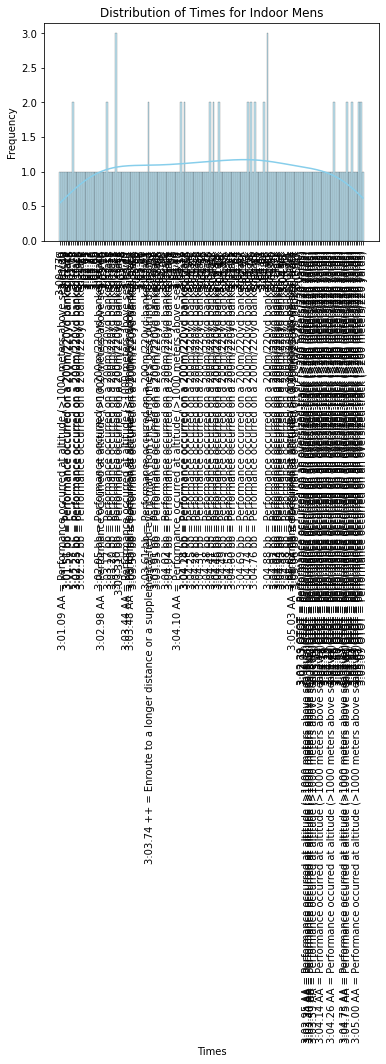

In [50]:
# Create a histogram using Seaborn
column_name = "Times"
sns.histplot(IndoorMens4x400m[column_name], bins=20, kde=True, color='skyblue', edgecolor='black')

plt.xticks(rotation=90)

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} for Indoor Mens')

# Show the plot
plt.show()

C:\Users\MoJo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


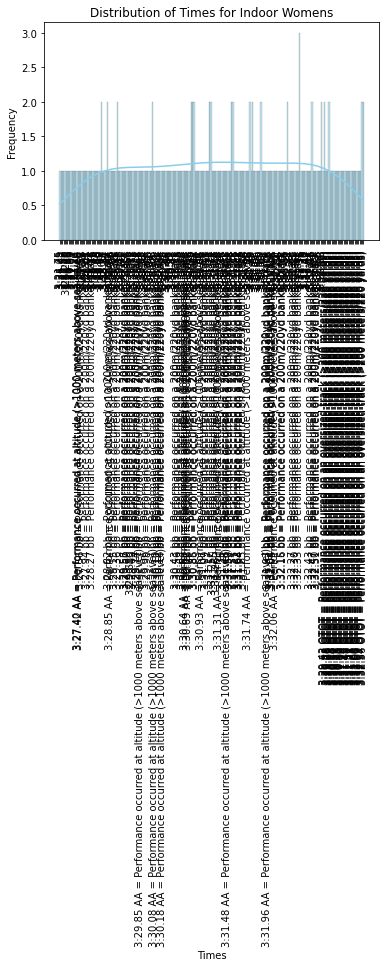

In [52]:
# Create a histogram using Seaborn
column_name = "Times"
sns.histplot(IndoorWomens4x400m[column_name], bins=20, kde=True, color='skyblue', edgecolor='black')

plt.xticks(rotation=90)

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} for Indoor Womens')

# Show the plot
plt.show()

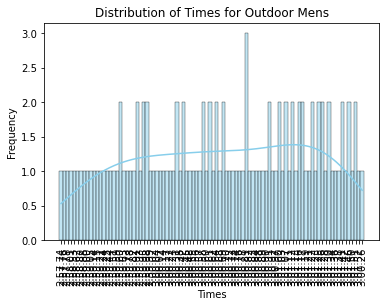

In [53]:
# Create a histogram using Seaborn
column_name = "Times"
sns.histplot(OutdoorMens4x400m[column_name], bins=20, kde=True, color='skyblue', edgecolor='black')

plt.xticks(rotation=90)

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} for Outdoor Mens')

# Show the plot
plt.show()

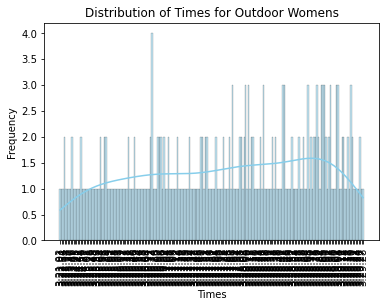

In [54]:
# Create a histogram using Seaborn
column_name = "Times"
sns.histplot(OutdoorWomens4x400m[column_name], bins=20, kde=True, color='skyblue', edgecolor='black')

plt.xticks(rotation=90)

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} for Outdoor Womens')

# Show the plot
plt.show()

In [55]:
### Schools

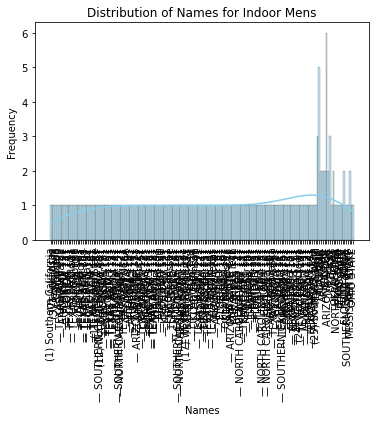

In [57]:
# Create a histogram using Seaborn
column_name = "Names"
sns.histplot(IndoorMens4x400m[column_name], bins=20, kde=True, color='skyblue', edgecolor='black')

plt.xticks(rotation=90)

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} for Indoor Mens')

# Show the plot
plt.show()

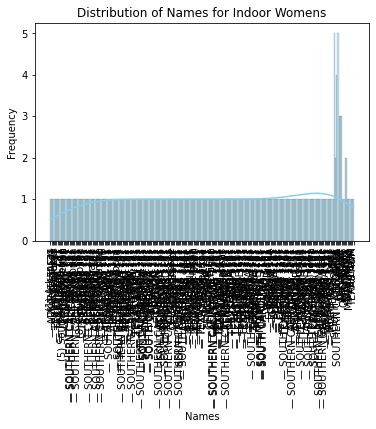

In [59]:
# Create a histogram using Seaborn
column_name = "Names"
sns.histplot(IndoorWomens4x400m[column_name], bins=20, kde=True, color='skyblue', edgecolor='black')

plt.xticks(rotation=90)

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} for Indoor Womens')

# Show the plot
plt.show()

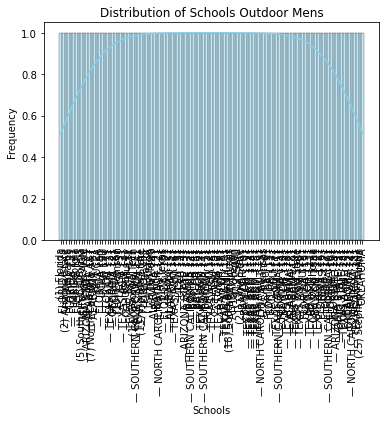

In [60]:
# Create a histogram using Seaborn
column_name = "Schools"
sns.histplot(OutdoorMens4x400m[column_name], bins=20, kde=True, color='skyblue', edgecolor='black')

plt.xticks(rotation=90)

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} Outdoor Mens')

# Show the plot
plt.show()

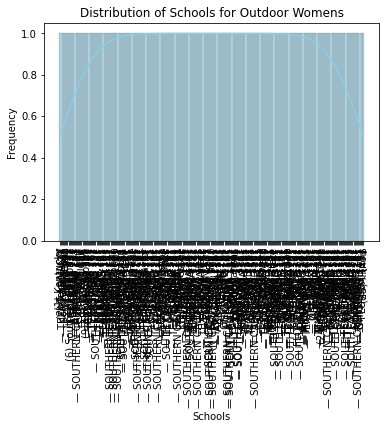

In [61]:
# Create a histogram using Seaborn
column_name = "Schools"
sns.histplot(OutdoorWomens4x400m[column_name], bins=20, kde=True, color='skyblue', edgecolor='black')

plt.xticks(rotation=90)

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} for Outdoor Womens')

# Show the plot
plt.show()